In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Histogram of charges')

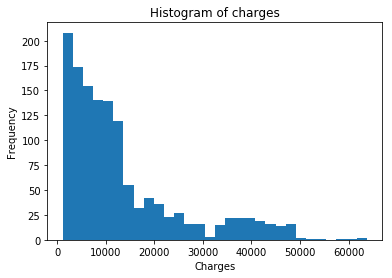

In [9]:
plt.hist(df.charges, bins = 30)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram of charges")

In [10]:
import numpy as np

In [13]:
mu, std = np.mean(df.charges), np.std(df.charges)
mu, std

(13270.422265141257, 12105.484975561605)

In [14]:
from scipy import stats

In [16]:
mu, std = np.mean(df.charges), np.std(df.charges)
a = stats.norm.rvs(loc = mu, scale = std, size = len(df) )

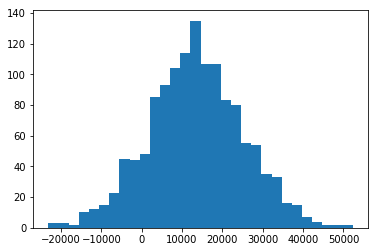

In [19]:
plt.hist(a, bins = 30);

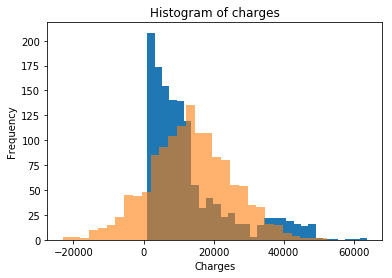

In [22]:
plt.hist(df.charges, bins = 30)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram of charges")
plt.hist(a, bins = 30, alpha = 0.6);

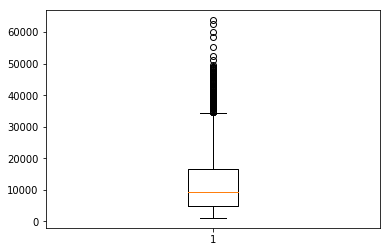

In [24]:
plt.boxplot(df.charges);

In [29]:

def outlier(y):
    q1, q3 = np.percentile(y, [25, 75])
    iqr = q3 - q1
    upper_whisker = min(np.max(y), q3 + 1.5 * iqr)
    lower_whisker = max(np.min(y), q1 - 1.5 * iqr)
    print(q1, q3, iqr, lower_whisker, upper_whisker)
    return (y > upper_whisker) | (y<lower_whisker)
df[outlier(df.charges)]

4740.28715 16639.912515 11899.625365 1121.8739 34489.350562499996


,age,gender,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
39,60,male,39.900,0,yes,southwest,48173.36100
49,36,male,35.200,1,yes,southeast,38709.17600
53,36,male,34.430,0,yes,southeast,37742.57570


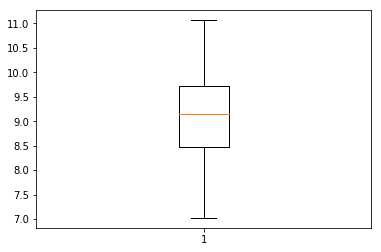

In [32]:
y = np.log(df.charges)
plt.boxplot(y);


plt.hist(y, bins = 30)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram of charges")
plt.hist(a, bins = 30, alpha = 0.6);

Text(0.5, 1.0, 'Histogram of charges')

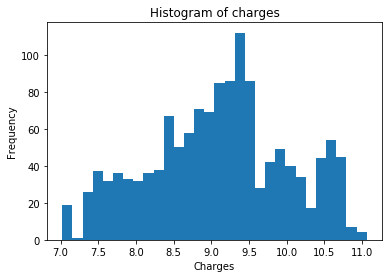

In [35]:
mu, std = np.mean(y), np.std(y)
a = stats.norm.rvs(loc = mu, scale = std, size = len(df) )

plt.hist(y, bins = 30)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram of charges")
#plt.hist(a, bins = 30, alpha = 0.6);

In [36]:
np.exp(9.4)

12088.380730216988

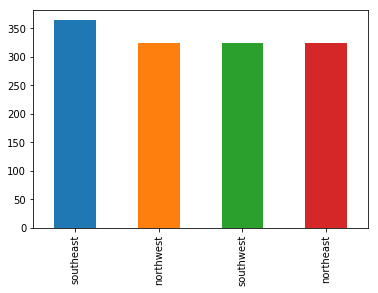

In [37]:
df.region.value_counts().plot.bar()

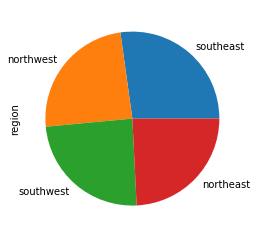

In [38]:
df.region.value_counts().plot.pie()

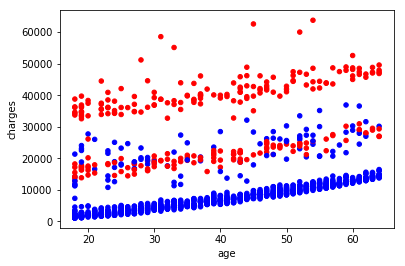

In [41]:
colors = np.where(df.smoker == "yes", "red", "blue")
df.plot.scatter("age", "charges", color = colors)

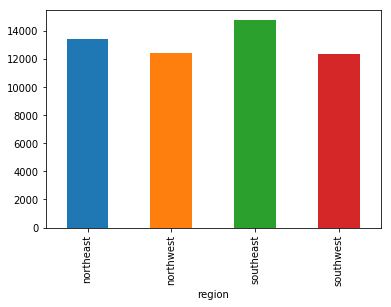

In [43]:
df.groupby("region").charges.mean().plot.bar()

In [46]:
import seaborn as sns

In [48]:
agg = df.pivot_table("charges", "region", "gender")
agg

gender,female,male
region,,
northeast,12953.203151,13854.005374
northwest,12479.870397,12354.119575
southeast,13499.669243,15879.617173
southwest,11274.411264,13412.883576


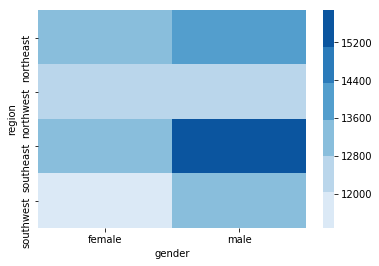

In [51]:
sns.heatmap(agg, cmap=sns.color_palette("Blues"))

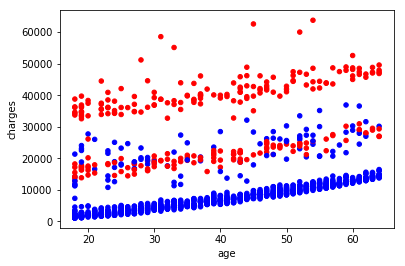

In [54]:
colors = np.where(df.smoker == "yes", "red", "blue")
df.plot.scatter("age", "charges", color = colors)

plt.savefig("plot.pdf")